## Logistic Regression
### from Carl Shan and Jen Selby

In [1]:
import numpy.random
from sklearn import linear_model
import matplotlib.pyplot

In [2]:
NUM_INPUTS = 1000
PLANT_A_AVG_HEIGHT = 60.0
PLANT_A_AVG_WIDTH = 8.0
PLANT_B_AVG_HEIGHT = 58.0
PLANT_B_AVG_WIDTH = 10.0
PLANT_C_AVG_HEIGHT = 56.0
PLANT_C_AVG_WIDTH = 5.0

In [3]:
plantA_heights = numpy.random.normal(loc=PLANT_A_AVG_HEIGHT, size=NUM_INPUTS)
plantA_widths = numpy.random.normal(loc=PLANT_A_AVG_WIDTH, size=NUM_INPUTS)

plantB_heights = numpy.random.normal(loc=PLANT_B_AVG_HEIGHT, size=NUM_INPUTS)
plantB_widths = numpy.random.normal(loc=PLANT_B_AVG_WIDTH, size=NUM_INPUTS)

plantC_heights = numpy.random.normal(loc=PLANT_C_AVG_HEIGHT, size=NUM_INPUTS)
plantC_widths = numpy.random.normal(loc=PLANT_C_AVG_WIDTH, size=NUM_INPUTS)

In [4]:
plant_heights = list(numpy.append(list(numpy.append(plantA_heights, plantB_heights)), plantC_heights))

In [5]:
plant_widths = list(numpy.append(list(numpy.append(plantA_widths, plantB_widths)), plantC_widths))

In [6]:
plant_inputs = list(zip(plant_heights, plant_widths))

In [7]:
plant_inputs

[(61.285840954091775, 9.1329790354813145),
 (60.869487792221349, 6.1786864221458897),
 (60.006442150833927, 8.7154443388013227),
 (59.022559806753719, 8.1542975908180289),
 (58.888797841305539, 7.9918271443390614),
 (59.53275385637923, 9.0582494400126699),
 (59.356633258573439, 8.5833856600559777),
 (61.103023741464447, 9.6167983398267012),
 (60.907747525115774, 8.2661860574580217),
 (59.738272762583563, 8.0239564999192368),
 (59.015875277672201, 8.3610531970835478),
 (59.272322461489473, 8.1226665989466618),
 (60.632967755583181, 6.6313990291874774),
 (59.774314389234931, 9.2484857284941775),
 (61.470976334665508, 8.3506624567184531),
 (60.57054364844663, 7.5085931795910232),
 (59.146374871770249, 8.3846286283778415),
 (59.575405093495633, 7.5756848371746512),
 (59.094809065602483, 7.7159193484508375),
 (59.567030138253443, 9.165856199866111),
 (59.872083406353845, 7.7860281380248519),
 (61.157497800412543, 8.4270186755473251),
 (59.018777699351773, 9.5140966362024635),
 (59.307251160

In [8]:
plantA_types = [0]*NUM_INPUTS + [1]*(NUM_INPUTS*2)
plantB_types = [1]*NUM_INPUTS + [0]*NUM_INPUTS + [1]*NUM_INPUTS
plantC_types = [1]*(NUM_INPUTS*2) + [0]*NUM_INPUTS

In [9]:
plantA_types

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [10]:
modelA = linear_model.LogisticRegression()
modelA.fit(plant_inputs, plantA_types)

modelB = linear_model.LogisticRegression()
modelB.fit(plant_inputs, plantB_types)

modelC = linear_model.LogisticRegression()
modelC.fit(plant_inputs, plantC_types)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
matplotlib.pyplot.scatter(plantA_heights, plantA_widths, c="red", marker="o")
matplotlib.pyplot.scatter(plantB_heights, plantB_widths, c="blue", marker="^")
matplotlib.pyplot.scatter(plantC_heights, plantC_widths, c="green", marker="s")

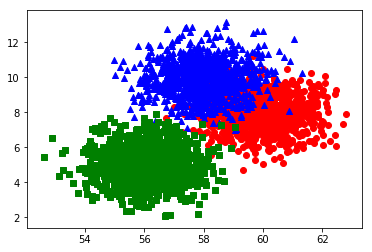

In [12]:
matplotlib.pyplot.show()

### Testing Our Model

In [13]:
# Make new plants

NUM_NEW = 5

npA_heights = numpy.random.normal(loc=PLANT_A_AVG_HEIGHT, size=NUM_NEW)
npA_widths = numpy.random.normal(loc=PLANT_A_AVG_WIDTH, size=NUM_NEW)

npB_heights = numpy.random.normal(loc=PLANT_B_AVG_HEIGHT, size=NUM_NEW)
npB_widths = numpy.random.normal(loc=PLANT_B_AVG_WIDTH, size=NUM_NEW)

npC_heights = numpy.random.normal(loc=PLANT_C_AVG_HEIGHT, size=NUM_NEW)
npC_widths = numpy.random.normal(loc=PLANT_C_AVG_WIDTH, size=NUM_NEW)

In [14]:
np_heights = list(numpy.append(list(numpy.append(npA_heights, npB_heights)), npC_heights))

In [15]:
np_widths = list(numpy.append(list(numpy.append(npA_widths, npB_widths)), npC_widths))

In [16]:
np_inputs = list(zip(np_heights, np_widths))

In [17]:
np_inputs

[(60.001237844453897, 8.4169888207564441),
 (60.802457960107546, 8.9555347957400091),
 (60.645135478708973, 8.3261168873315565),
 (60.379562840672577, 8.3613497517146751),
 (59.964061870275714, 6.4383599142745904),
 (58.294038927263621, 9.8941816890008223),
 (58.218948272864026, 9.6944487865567783),
 (57.602126867550425, 10.179204024941917),
 (58.754038322680827, 10.583784985055681),
 (58.181524890163089, 10.532755686202181),
 (57.475395732887797, 3.6947634797209012),
 (55.837952518462231, 4.6140282882620989),
 (56.53838634622165, 4.9714753825794107),
 (56.666464402243783, 6.7207763112671053),
 (56.813492144304277, 6.7529987840899803)]

In [18]:
predictionA = modelA.predict_proba(np_inputs)
predictionB = modelB.predict_proba(np_inputs)
predictionC = modelC.predict_proba(np_inputs)
print(predictionA)
print("Hi")
print(predictionB)
print("Hi")
print(predictionC)

[[ 0.48726358  0.51273642]
 [ 0.54904153  0.45095847]
 [ 0.54806107  0.45193893]
 [ 0.52310322  0.47689678]
 [ 0.52604269  0.47395731]
 [ 0.30941729  0.69058271]
 [ 0.30718193  0.69281807]
 [ 0.25335263  0.74664737]
 [ 0.33335144  0.66664856]
 [ 0.28934148  0.71065852]
 [ 0.36033586  0.63966414]
 [ 0.22224832  0.77775168]
 [ 0.26379263  0.73620737]
 [ 0.24440532  0.75559468]
 [ 0.25397391  0.74602609]]
Hi
[[  1.54474239e-01   8.45525761e-01]
 [  3.07577809e-01   6.92422191e-01]
 [  1.01438925e-01   8.98561075e-01]
 [  1.20477844e-01   8.79522156e-01]
 [  2.02361811e-03   9.97976382e-01]
 [  9.16714866e-01   8.32851340e-02]
 [  8.78097338e-01   1.21902662e-01]
 [  9.65893331e-01   3.41066695e-02]
 [  9.77621041e-01   2.23789587e-02]
 [  9.80239435e-01   1.97605650e-02]
 [  1.11404173e-05   9.99988860e-01]
 [  1.82285133e-04   9.99817715e-01]
 [  3.05940344e-04   9.99694060e-01]
 [  1.54727589e-02   9.84527241e-01]
 [  1.56411937e-02   9.84358806e-01]]
Hi
[[  1.27266200e-02   9.87273380e

In [21]:
for x in range(0, len(np_inputs)):
    prob_A = predictionA[x][0]
    prob_B = predictionB[x][0]
    prob_C = predictionC[x][0]
    print(x)
    print(prob_A)
    print(prob_B)
    print(prob_C)
    if x < 5:
        this_marker = "o"
    elif x < 10:
        this_marker = "^"
    else:
        this_marker = "s"
    if max(prob_A, prob_B, prob_C) == prob_A:
        matplotlib.pyplot.scatter(np_inputs[x][0], np_inputs[x][1], c="red", marker=this_marker)
    elif max(prob_A, prob_B, prob_C) == prob_B:
        matplotlib.pyplot.scatter(np_inputs[x][0], np_inputs[x][1], c="blue", marker=this_marker)
    else:
        matplotlib.pyplot.scatter(np_inputs[x][0], np_inputs[x][1], c="green", marker=this_marker)

0
0.487263584314
0.15447423891
0.0127266200215
1
0.549041530508
0.307577808566
0.00395337700185
2
0.548061071645
0.10143892522
0.0167774716074
3
0.523103215573
0.120477844054
0.0150501196472
4
0.526042687557
0.00202361811038
0.569886822462
5
0.309417291424
0.916714865993
0.000338121463679
6
0.307181926075
0.878097337767
0.000535590752999
7
0.253352629548
0.965893330502
0.000161279817205
8
0.333351438272
0.977621041277
7.05237580665e-05
9
0.289341477075
0.980239435002
7.48507087562e-05
10
0.360335855881
1.11404173044e-05
0.998421262925
11
0.222248324581
0.00018228513275
0.984073958863
12
0.263792630449
0.000305940344485
0.966417017836
13
0.244405322539
0.0154727588819
0.326040733338
14
0.25397390673
0.0156411937444
0.312976815453


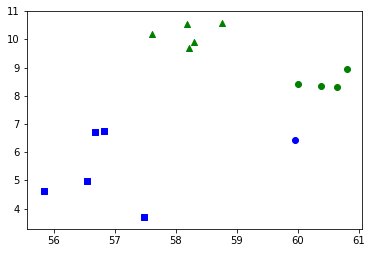

In [20]:
matplotlib.pyplot.show()